# Goal : To create word vectors from Game of Thrones dataset and analyze them to see semantic similarity

## Summary Steps:
### 1) Load dependencies (see next cell) 
### 2) Process data
    a) download punkt (pre trained sentence tokenizer)
    b) download stopwords list
    c) construct a raw corpus by reading text data in utf-8 format
    d) split corpus into sentences by using punkt tokenizer
    e) convert sentences as list of import words using glob/regex (corpus turns to list of sentences where each sentence is a list of words)
### 3) Train using word2vec
    a) build vocab (get words in the vocabulary list)
    b) train over the sentences using the vocab (to generate symantic context i.e. word vectors)
    c) to visualise (reduce the dimensions to 2)
    d) to check similarities use most_similar() & most_similar_cosmul() functions

In [2]:
#Step 0 : load dependencies
from __future__ import print_function,division,absolute_import
#reason we import future because it's the missing link between python 2 and 3
#allows us to import functions of both (Acts as bridge between both)
import codecs #for word encoding
import glob ##finds all pathnames matching a pattern, like regex
import multiprocessing #concurrency & multithreading & for faster processing
import os #dealing with operating system like reading a file
import pprint #pretty printing, human readable
import re #granular regular expression
import nltk #natural laguage tool kit
import gensim.models.word2vec as w2v  #word to vectors
import sklearn.manifold #dimensionality reduction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualisation

In [2]:
#Step 1 : process data
#clean data
nltk.download('punkt') #pretrained tokenizer
nltk.download('stopwords') #contains common words like a,an, the, of etc.

[nltk_data] Downloading package punkt to /home/sayon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sayon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#get the book file names, matching txt files
book_filenames = sorted(glob.glob("got_books/data/*.txt"))

In [4]:
book_filenames #= book_filenames[:2]

['got_books/data/got1.txt',
 'got_books/data/got2.txt',
 'got_books/data/got3.txt',
 'got_books/data/got4.txt',
 'got_books/data/got5.txt']

In [5]:
#create raw corpus in utf-8 format, for that reason codecs is required
corpus_raw = u""
for book in book_filenames:
    print("Reading {0}....".format(book))
    with codecs.open(book,'r','utf-8') as book:
        corpus_raw+=book.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))

Reading got_books/data/got1.txt....
Corpus is now 1770659 characters long
Reading got_books/data/got2.txt....
Corpus is now 4071041 characters long
Reading got_books/data/got3.txt....
Corpus is now 6391405 characters long
Reading got_books/data/got4.txt....
Corpus is now 8107945 characters long
Reading got_books/data/got5.txt....
Corpus is now 9719485 characters long


# split corpus into sentences

In [6]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [7]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [8]:
#convert into list of words
#remove unnecessary characters, split into words,no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ",raw)
    words = clean.split()
    return words

In [9]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if(len(raw_sentence)>0):
        sentences.append(sentence_to_wordlist(raw_sentence))

In [10]:
print(raw_sentences[15])
print(sentences[15])

The maester did not believe in omens.
[u'The', u'maester', u'did', u'not', u'believe', u'in', u'omens']


In [11]:
#whenever we are dealing with words unicode is the format we want for vectors
#and utf-8 is the format in reading from blobs
total_tokens = sum([len(sentence) for sentence in sentences])
print("Total number of tokens are {0}".format(total_tokens))

Total number of tokens are 1818103


In [12]:
print(len(sentences))
print(len(raw_sentences))

128868
128868


# Train Word2Vec

word vectors and word embeddings are the same thing explaining the semantics of the word in a multi dimensional space

if we enter a new word in to a trained word vector model then it would be closer to those words to which it shares similarity(semantics)

post generating these word vectors(word embeddings) there are 3 main tasks that these vectors help us with: <br/> 
1) Distance <br/>
2) Similarity <br/>
3) Ranking <br/>

In [13]:
#Step 1: Build Model
#number of features is the dimensionality of word vectors
#Dimensionality of resulting word vectors
#more dimensionality, more computationally expensive to train but more accurate
#more dimensions = more generalized
num_features = 300

#minimum word count threshold
min_word_count = 3  #smallest set of words we want to recognise when we convert to vectors

#Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()  #more workers, faster we train

#context window length
context_size = 7 #looking 7 words here at a time while sliding through sentence word list

#Downsample setting for frequent words
#if more frequent the word is then it becomes less useful for the model
#sets the minimum threshold beyond which if the freuqency increases then the word becomes non-useful
downsampling = 1e-3

#seed for the Random Number Generation, to make the results reproducible
#deterministic, good for debugging
seed = 1

In [14]:
thrones2vec = w2v.Word2Vec(
                  sg=1,
                  seed=seed,
                  workers=num_workers,
                  size=num_features,
                  min_count=min_word_count,
                  window=context_size,
                  sample=downsampling)

In [15]:
thrones2vec.build_vocab(sentences=sentences)  #number representations we create and feed it into our model

In [16]:
print ("Word2Vec vocbulary length:",len(thrones2vec.wv.vocab))

Word2Vec vocbulary length: 17277


# Start training

In [17]:
thrones2vec.train(sentences)

7023153

In [18]:
if not os.path.exists('word_vector_trained'):
    os.mkdir('word_vector_trained')
thrones2vec.save('word_vector_trained/thrones2vec.w2v')
#saving the word vector to use it later

# Explore the trained model

In [3]:
thrones2vec = w2v.Word2Vec.load('word_vector_trained/thrones2vec.w2v')

In [4]:
thrones2vec.wv.vocab

{u'fawn': <gensim.models.keyedvectors.Vocab at 0x7fb30095f8d0>,
 u'raining': <gensim.models.keyedvectors.Vocab at 0x7fb30095f910>,
 u'writings': <gensim.models.keyedvectors.Vocab at 0x7fb30095f950>,
 u'Ysilla': <gensim.models.keyedvectors.Vocab at 0x7fb30095f990>,
 u'Rory': <gensim.models.keyedvectors.Vocab at 0x7fb2c2e0e490>,
 u'hordes': <gensim.models.keyedvectors.Vocab at 0x7fb30095fa10>,
 u'mustachio': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46850>,
 u'Greyjoy': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46890>,
 u'yellow': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46910>,
 u'four': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46950>,
 u'prices': <gensim.models.keyedvectors.Vocab at 0x7fb2c2e0e4d0>,
 u'woods': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a469d0>,
 u'clotted': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46a10>,
 u'spiders': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46a50>,
 u'hanging': <gensim.models.keyedvectors.Vocab at 0x7fb2c7a46a90>,
 u'ring

### Compress the word vectors to 2D to visualize them

In [21]:
tsne = sklearn.manifold.TSNE(n_components=2,random_state=0)  #takes n dimensional vector and squashes it to 2D

In [22]:
all_word_vectors_matrix = thrones2vec.wv.syn0

In [23]:
all_word_vectors_matrix.shape

(17277, 300)

In [24]:
#17277 words and 300 features

#### Train t-SNE to visualise later

In [25]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [55]:
points = pd.DataFrame(columns=['words','x','y'])
words = [word for word in thrones2vec.wv.vocab]
for i in range(all_word_vectors_matrix_2d.shape[0]):
    points = points.append(pd.DataFrame([[words[i],all_word_vectors_matrix[i,0],all_word_vectors_matrix[i,0]]],
                                        columns=['words','x','y']),
                                        ignore_index=True)

In [57]:
points.shape

(11048, 3)

In [58]:
sns.set_context('poster')

In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


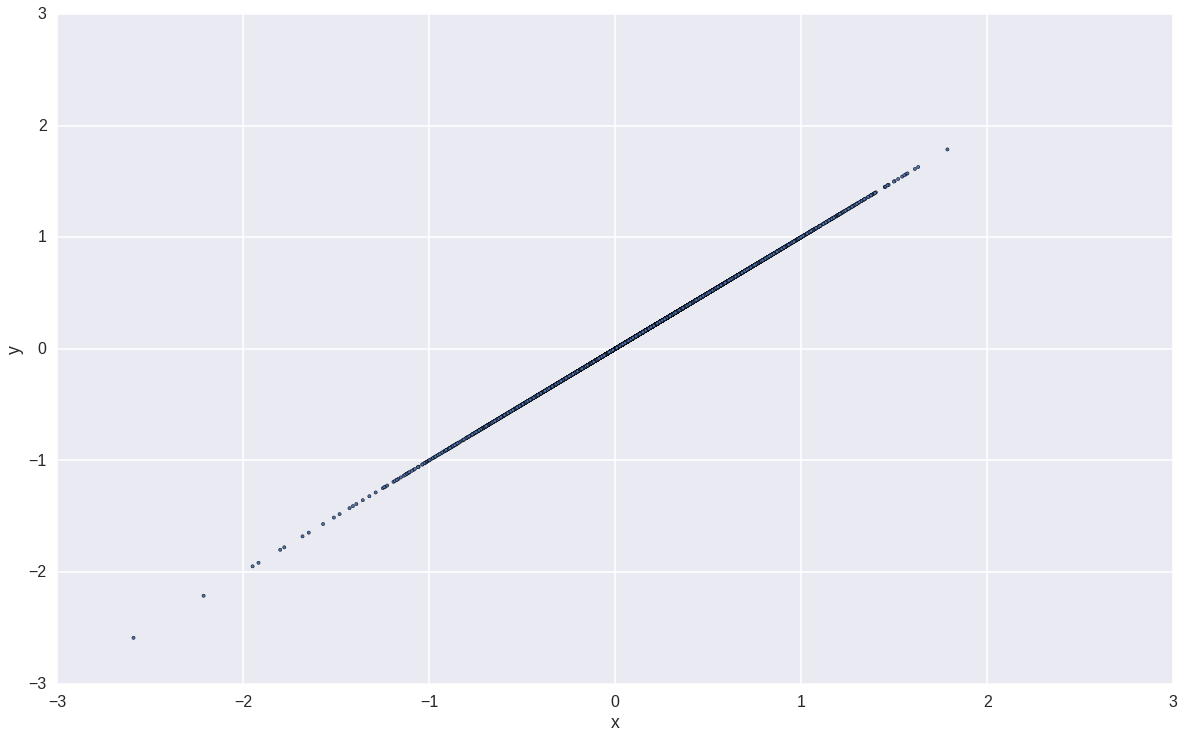

In [61]:
points.plot.scatter("x","y",s=10,figsize=(20,12))

In [ ]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.words, fontsize=11)

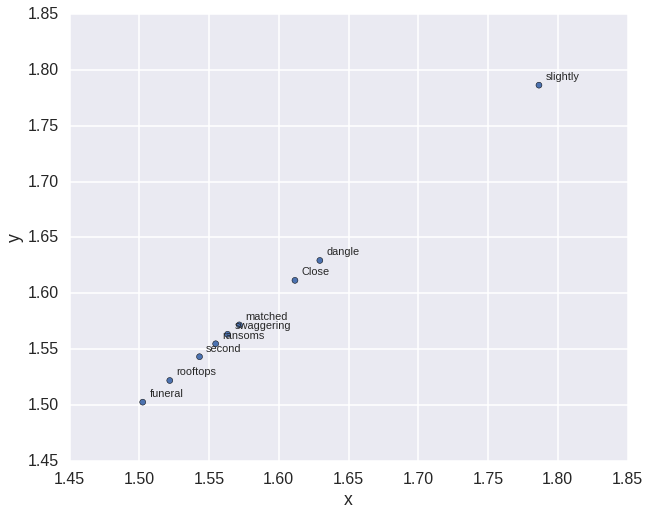

In [66]:
plot_region(x_bounds=(1.5, 2.0), y_bounds=(1.5, 2.0))

In [38]:
thrones2vec.most_similar('Stark')

[(u'Eddard', 0.7332819104194641),
 (u'Winterfell', 0.6474947929382324),
 (u'beheaded', 0.6247559785842896),
 (u'Lyanna', 0.6226118803024292),
 (u'Robb', 0.6159043312072754),
 (u'executed', 0.6154361367225647),
 (u'direwolf', 0.61335688829422),
 (u'Rickard', 0.6119989156723022),
 (u'Brandon', 0.611007571220398),
 (u'Arryn', 0.6077004671096802)]

In [54]:
thrones2vec.most_similar('Aerys')

[(u'Jaehaerys', 0.7684574127197266),
 (u'reign', 0.7470789551734924),
 (u'Mad', 0.7455924153327942),
 (u'Daeron', 0.7368917465209961),
 (u'Unworthy', 0.717677652835846),
 (u'Beggar', 0.7144438028335571),
 (u'rebellion', 0.7144118547439575),
 (u'II', 0.7104942798614502),
 (u'valor', 0.7054134607315063),
 (u'Maekar', 0.7007839679718018)]

In [59]:
thrones2vec.most_similar('Jon')

[(u'Snow', 0.7295814752578735),
 (u'Sam', 0.6166950464248657),
 (u'Ygritte', 0.5785415172576904),
 (u'Val', 0.5697051286697388),
 (u'Styr', 0.5680646896362305),
 (u'Benjen', 0.5654860138893127),
 (u'Qhorin', 0.5534363389015198),
 (u'Magnar', 0.5526526570320129),
 (u'Chett', 0.5517590045928955),
 (u'Ned', 0.5454902052879333)]

In [66]:
thrones2vec.most_similar('Lyanna')

[(u'plotted', 0.8233679533004761),
 (u'Bael', 0.818939208984375),
 (u'executed', 0.814521312713623),
 (u'marrying', 0.8113622665405273),
 (u'blushing', 0.8069310188293457),
 (u'Wylla', 0.7993110418319702),
 (u'darling', 0.7929027080535889),
 (u'weds', 0.7928354144096375),
 (u'inseparable', 0.7926414012908936),
 (u'Lump', 0.7900139689445496)]

In [25]:
thrones2vec.most_similar('Shae')

[(u'Taena', 0.797646164894104),
 (u'Alayaya', 0.7765731811523438),
 (u'Cedra', 0.775435209274292),
 (u'Senelle', 0.7653691172599792),
 (u'Esgred', 0.7647099494934082),
 (u'Lemore', 0.7632046341896057),
 (u'Obara', 0.7588218450546265),
 (u'blushing', 0.7556425929069519),
 (u'Marillion', 0.7556105256080627),
 (u'Pia', 0.7516484260559082)]

In [71]:
thrones2vec.most_similar('Hound')

[(u'Mycah', 0.7573425769805908),
 (u'Tickler', 0.7480617761611938),
 (u'Mountain', 0.7177949547767639),
 (u'Dornishman', 0.7165530920028687),
 (u'wineseller', 0.6957194805145264),
 (u'Polliver', 0.6944596767425537),
 (u'Sandor', 0.6919390559196472),
 (u'Gendry', 0.6756781339645386),
 (u'puppy', 0.6734050512313843),
 (u'Clegane', 0.6718208193778992)]

In [73]:
thrones2vec.most_similar('Melisandre')

[(u'Selyse', 0.7064837217330933),
 (u'Moqorro', 0.7047680020332336),
 (u'Benerro', 0.6977939009666443),
 (u'priestess', 0.6706072092056274),
 (u'Val', 0.6589406728744507),
 (u'Merryweather', 0.6576294898986816),
 (u'god', 0.6484695672988892),
 (u'sorceress', 0.6442724466323853),
 (u'Lyanna', 0.6340209245681763),
 (u'flames', 0.6314945220947266)]

In [5]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))

In [6]:
nearest_similarity_cosmul('Winterfell','Stark','Lannister')

Winterfell is related to Stark, as Casterly is related to Lannister


In [7]:
nearest_similarity_cosmul('Cersei','Robert','Stark')

Cersei is related to Robert, as Catelyn is related to Stark


In [13]:
nearest_similarity_cosmul('Stark','Sansa','Daenerys')

Stark is related to Sansa, as Targaryen is related to Daenerys


In [30]:
nearest_similarity_cosmul('Rickon','Sansa','Cersei')

Rickon is related to Sansa, as condemned is related to Cersei
